In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import string
from collections import Counter
import nltk
import os
import glob
import re

In [2]:
folder_path = os.path.expanduser('~/Desktop/BI/Labs/Lab 4/Lab4_dataset/star_wars_movies_scripts')
print(f"Looking for text files in: {os.path.join(folder_path, '*.txt')}")

Looking for text files in: /Users/rupalimohapatra/Desktop/BI/Labs/Lab 4/Lab4_dataset/star_wars_movies_scripts/*.txt


In [3]:
# Use glob to find all text files in the folder
text_files = glob.glob(os.path.join(folder_path, '*.txt'))
# Check if any files were found
if not text_files:
    print(f"No text files found in the folder: {folder_path}")
else:
    print(f"Found {len(text_files)} text files in the folder: {folder_path}")

Found 3 text files in the folder: /Users/rupalimohapatra/Desktop/BI/Labs/Lab 4/Lab4_dataset/star_wars_movies_scripts


In [4]:
# Read the content of each file
files_content = []
file_names = []

for file_path in text_files:
    with open(file_path, 'r') as file:
        content = file.read()
        files_content.append(content)
        file_names.append(os.path.basename(file_path))

# Print a summary of each file
for name, content in zip(file_names, files_content):
    print(f"File: {name}")
    print(f"Length of content: {len(content)} characters")
    print(f"Preview: {content[:500]}...\n")

File: SW_EpisodeVI.txt
Length of content: 48176 characters
Preview: "character" "dialogue"
"1" "SHUTTLE CAPTAIN" "Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield."
"2" "DEATH STAR CONTROLLER" "The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by... You are clear to proceed."
"3" "SHUTTLE CAPTAIN" "We're starting our approach."
"4" "OFFICER" "Inform the commander that Lord Vader's shuttle has arrived."
"5" "OPERATOR" "Yes, sir."
"6" "JERJER...

File: SW_EpisodeV.txt
Length of content: 55487 characters
Preview: "character" "dialogue"
"1" "LUKE" "Echo Three to Echo Seven. Han, old buddy, do you  read me?"
"2" "HAN" "Loud and clear, kid. What's up?"
"3" "LUKE" "Well, I finished my circle. I don't pick up any  life readings."
"4" "HAN" "There isn't enough life on this ice cube to fill a  space cruiser. The sensors are placed. I'm going back."
"5" "LUKE" "Right. I'll s

#### Task 1: Find the characters with the most dialogues in each episode of The OriginalTrilogy (Episodes IV, V, VI).

In [6]:
# Function to extract dialogues and characters
def extract_dialogues(script):
    dialogues = re.findall(r'\"(\d+)\" \"(.*?)\" \"(.*?)\"', script)
    return dialogues

# Extract dialogues for each episode
dialogues_IV = extract_dialogues(files_content[2])  # Episode IV
dialogues_V = extract_dialogues(files_content[1])   # Episode V
dialogues_VI = extract_dialogues(files_content[0])  # Episode VI

# Count dialogues per character for each episode
def count_dialogues(dialogues):
    character_dialogue_count = Counter()
    for dialogue in dialogues:
        character = dialogue[1]
        character_dialogue_count[character] += 1
    return character_dialogue_count

count_IV = count_dialogues(dialogues_IV)
count_V = count_dialogues(dialogues_V)
count_VI = count_dialogues(dialogues_VI)

# Get top 10 characters by number of dialogues for each episode
top_IV = count_IV.most_common(10)
top_V = count_V.most_common(10)
top_VI = count_VI.most_common(10)

#### Task 2: Plot the number of dialogues according to the character for each episode (i.e.plot the above findings).

In [7]:
# Plotting function
def plot_dialogues(counts, episode_title):
    characters, dialogue_counts = zip(*counts)
    plt.figure(figsize=(10, 5))
    plt.bar(characters, dialogue_counts)
    plt.title(f'Number of Dialogues per Character in {episode_title}')
    plt.xlabel('Characters')
    plt.ylabel('Number of Dialogues')
    plt.xticks(rotation=45)
    plt.show()

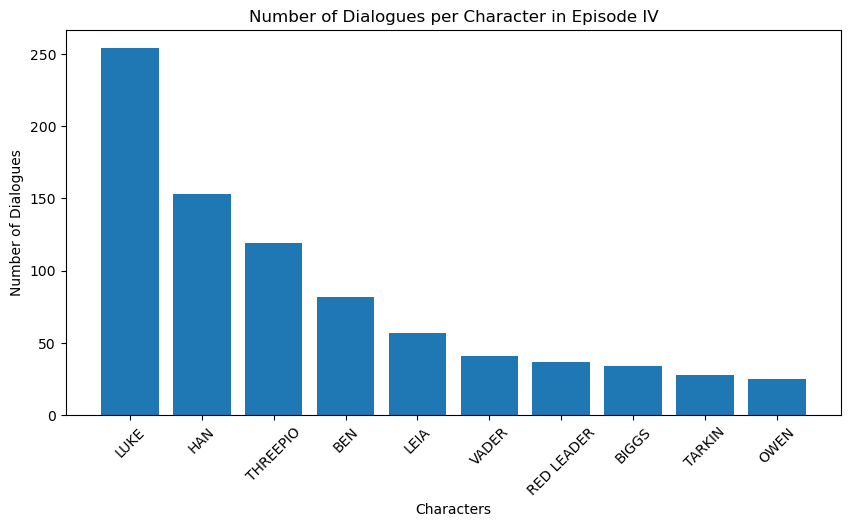

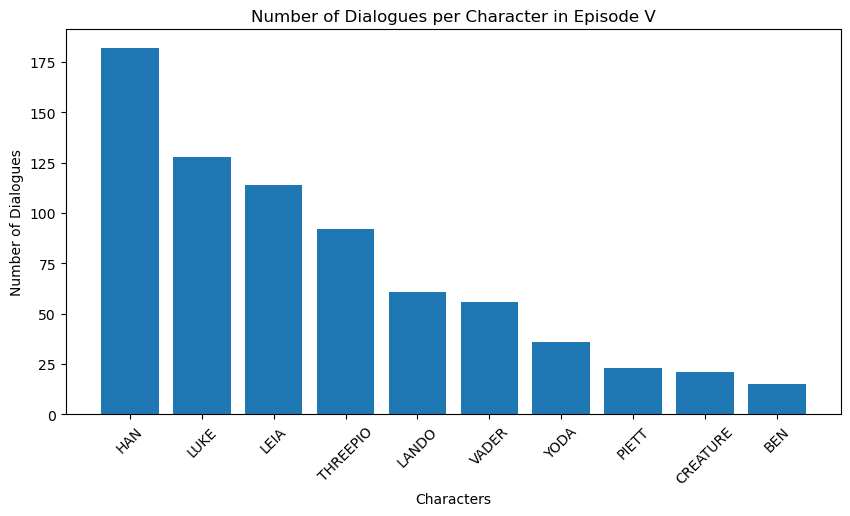

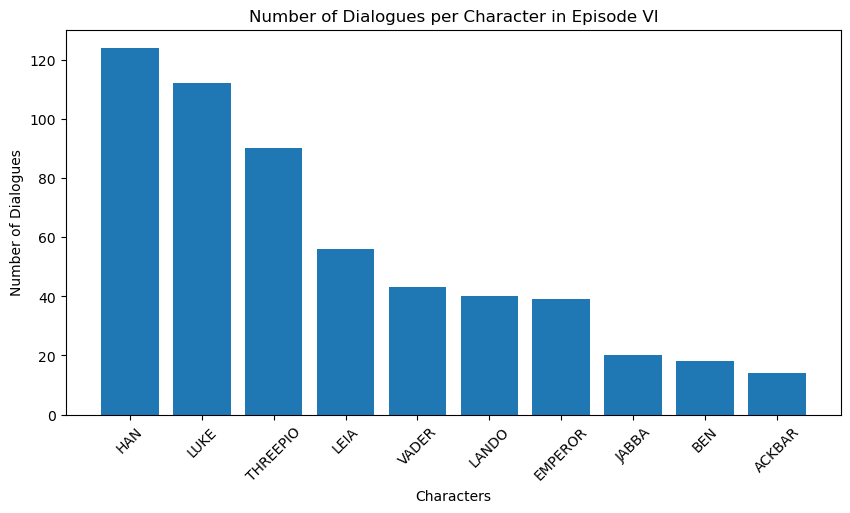

In [8]:
# Plot the results for each episode
plot_dialogues(top_IV, 'Episode IV')
plot_dialogues(top_V, 'Episode V')
plot_dialogues(top_VI, 'Episode VI')

In [9]:
# Print the characters with the most dialogues in each episode
print(f"Episode IV: Character with most dialogues: {top_IV[0][0]}, Dialogues: {top_IV[0][1]}")
print(f"Episode V: Character with most dialogues: {top_V[0][0]}, Dialogues: {top_V[0][1]}")
print(f"Episode VI: Character with most dialogues: {top_VI[0][0]}, Dialogues: {top_VI[0][1]}")

Episode IV: Character with most dialogues: LUKE, Dialogues: 254
Episode V: Character with most dialogues: HAN, Dialogues: 182
Episode VI: Character with most dialogues: HAN, Dialogues: 124


#### Task 3: Add a new column “episode” to the three datasets (to distinguish between the three episodes) and concatenate them into one dataset.

In [10]:
# Create DataFrames for each episode
df_IV = pd.DataFrame(dialogues_IV, columns=['Number', 'Character', 'Dialogue'])
df_V = pd.DataFrame(dialogues_V, columns=['Number', 'Character', 'Dialogue'])
df_VI = pd.DataFrame(dialogues_VI, columns=['Number', 'Character', 'Dialogue'])

# Add the "episode" column with the episode number
df_IV['Episode'] = 'IV'
df_V['Episode'] = 'V'
df_VI['Episode'] = 'VI'

# Concatenate the DataFrames into one
df_concatenated = pd.concat([df_IV, df_V, df_VI])

# Display the concatenated DataFrame
print(df_concatenated.head())

  Number Character                                           Dialogue Episode
0      1  THREEPIO  Did you hear that?  They've shut down the main...      IV
1      2  THREEPIO                                      We're doomed!      IV
2      3  THREEPIO  There'll be no escape for the Princess this time.      IV
3      4  THREEPIO                                       What's that?      IV
4      5  THREEPIO  I should have known better than to trust the l...      IV


#### Task 4 - Discover the frequency distribution of words in The Original Trilogy.

In [11]:
#Download necessary NLTK data
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Additional custom words to remove
custom_stop_words = set(["im", "us", "oh", "dont", "get", "going", "go","got", "youre", "one", 
                         "sir", "yes", "right", "see", "know", "well", "come", "like", "must", "cant", "thats"])

# Combine both sets of stopwords
stop_words.update(custom_stop_words)

# Function to preprocess text
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing
    tokens = nltk.word_tokenize(text)
    # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to each file's content
preprocessed_files_content = [preprocess_text(content) for content in files_content]

# Combine all tokens from all files
all_tokens = [token for tokens in preprocessed_files_content for token in tokens]

# Compute the frequency distribution of words
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Print the most common words
print("Most common words after removing additional custom stopwords:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words after removing additional custom stopwords:
luke: 624
han: 491
threepio: 321
leia: 261
vader: 191
ben: 133
lando: 124
leader: 83
red: 83
artoo: 80
good: 79
emperor: 76
take: 75
ship: 74
back: 73
yoda: 66
look: 65
chewie: 64
think: 63
time: 61


#### Task 5: Create a Frequency Distribution plot of the most repeated words in The OriginalTrilogy.

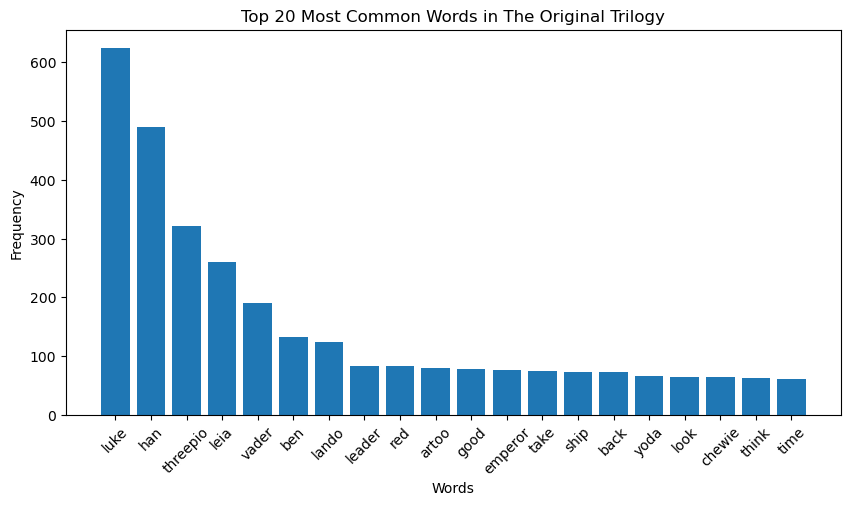

In [12]:
# Get the N most common words for plotting
N = 20
most_common_words = word_freq.most_common(N)

# Separate words and frequencies for plotting
words, freqs = zip(*most_common_words)

# Plot the frequency distribution
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title('Top 20 Most Common Words in The Original Trilogy')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Task 6 - Perform text-mining operations to prepare your dataset for further text analysis. (Usethe NLTK library)
a.Convert to lower case, word tokenization, removing stopwords, lexiconnormalization (lemmatization), etc.
b.Add the resulting array list to the dataset as a new column, “new_script”.

In [14]:
# Apply preprocessing to each row in the dataset
df_concatenated['new_script'] = df_concatenated['Dialogue'].apply(preprocess_text)

# Display the updated dataset with the new column
print(df_concatenated.head())

  Number Character                                           Dialogue Episode  \
0      1  THREEPIO  Did you hear that?  They've shut down the main...      IV   
1      2  THREEPIO                                      We're doomed!      IV   
2      3  THREEPIO  There'll be no escape for the Princess this time.      IV   
3      4  THREEPIO                                       What's that?      IV   
4      5  THREEPIO  I should have known better than to trust the l...      IV   

                                          new_script  
0  [hear, theyve, shut, main, reactor, destroyed,...  
1                                           [doomed]  
2                  [therell, escape, princess, time]  
3                                            [whats]  
4  [known, better, trust, logic, halfsized, therm...  


#### Task 7: Repeat steps 4 & 5 but check the frequency distribution of the “new_script” this time

In [21]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Additional custom words to remove
custom_stop_words = set(["im", "us", "oh", "dont", "get", "going", "go","got", "youre", "one", 
                         "sir", "yes", "right", "see", "know", "well", "come", "like", "must", "cant", "thats"])

# Combine both sets of stopwords
stop_words.update(custom_stop_words)

# Function to preprocess text
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing
    tokens = nltk.word_tokenize(text)
    # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to each file's content
preprocessed_files_content = [preprocess_text(content) for new_script in files_content]

# Combine all tokens from all files
all_tokens = [token for tokens in preprocessed_files_content for token in tokens]

# Compute the frequency distribution of words
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Print the most common words
print("Most common words after removing additional custom stopwords:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words after removing additional custom stopwords:
luke: 954
han: 489
threepio: 396
ben: 279
red: 225
leader: 192
leia: 180
vader: 156
biggs: 132
ship: 120
think: 111
look: 105
owen: 105
back: 99
tarkin: 93
time: 90
trooper: 90
gold: 90
ive: 87
take: 87


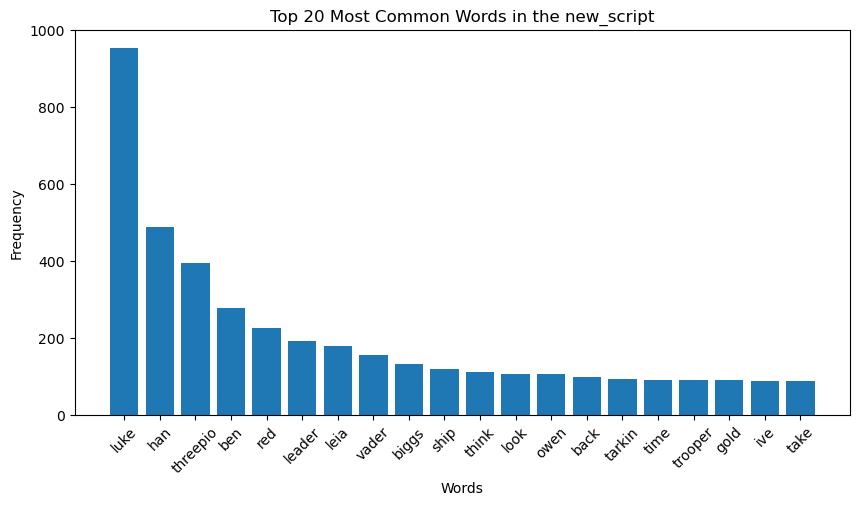

In [22]:
# Get the N most common words for plotting
N = 20
most_common_words = word_freq.most_common(N)

# Separate words and frequencies for plotting
words, freqs = zip(*most_common_words)

# Plot the frequency distribution
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title('Top 20 Most Common Words in the new_script')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [71]:
#Function to preprocess text
def preprocess_text(text):
    # Check if text is already a string
    if isinstance(text, str):
        # Lowercasing
        text = text.lower()
        # Removing punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenizing
        tokens = nltk.word_tokenize(text)
        # Removing stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatize tokens
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join tokens back into a string
        processed_text = ' '.join(tokens)
    else:
        # If text is a list of tokens, join them into a single string
        processed_text = ' '.join(text)
    return processed_text
# Apply preprocessing to the "new_script" column
df_concatenated['new_script'] = df_concatenated['new_script'].apply(preprocess_text)

#### Task 8: Use Word Clouds to visually represent the most repeated words for Darth Vader andYoda. 
(Use the provided word cloud masks, make a single word cloud for eachcharacter.)

In [72]:
# Filter the dataframe for rows where the Character is Vader
filtered_df_vader = df_concatenated[df_concatenated['Character'].str.lower().isin(['vader'])]

# Print the filtered dataframe
print(filtered_df_vader.head())


   Number Character                                           Dialogue  \
11     12     VADER     Where are those transmissions you intercepted?   
13     14     VADER  If this is a consular ship... where is the Amb...   
14     15     VADER  Commander, tear this ship apart until you've f...   
42     43     VADER  Don't play games with me, Your Highness.  You ...   
44     45     VADER  You're a part of the Rebel Alliance... and a t...   

   Episode                                         new_script  \
11      IV                           transmission intercepted   
13      IV                           consular ship ambassador   
14      IV  commander tear ship apart youve found plan bri...   
42      IV  play game highness werent mercy mission time p...   
44      IV              part rebel alliance traitor take away   

                                preprocessed_dialogue  \
11                           transmission intercepted   
13                           consular ship ambassa

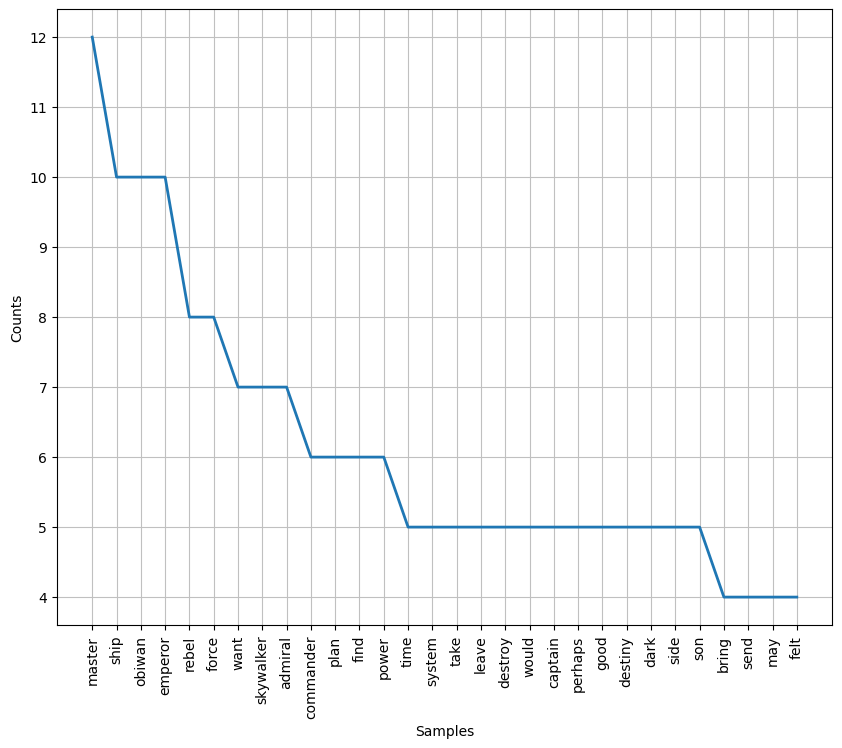

In [73]:
# Dialogues of Vader
vader_dialogues = ' '.join(filtered_df_vader['new_script'])

# Tokenize the combined preprocessed text into words
tokens = vader_dialogues.split()

# Compute the frequency distribution of words
word_freq = Counter(tokens)

# Get the most common words
most_common_words = word_freq.most_common(30)

fdist = FreqDist(tokens)
# Plot the frequency distribution
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 8))
fdist.plot(30, cumulative=False)
plt.show()

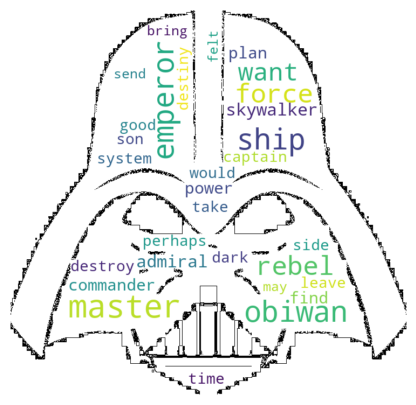

In [76]:
# Get the top 15 words and their counts
top_15_words_dict = dict(fdist.most_common(30))
# Load the mask image
mask_image_path = os.path.expanduser('~/Desktop/BI/Labs/Lab 4/Lab4_dataset/wordcloud_masks/vader.jpg') 
mask_image_vader = np.array(Image.open(mask_image_path))
# Generate a word cloud for the top 30words
wordcloud = WordCloud(width=800, height=400, mask=mask_image_vader,background_color='white', contour_color='black', contour_width=1).generate_from_frequencies(top_15_words_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
# Filter the dataframe for rows where the Character is Yoda
filtered_df_yoda = df_concatenated[df_concatenated['Character'].str.lower().isin(['yoda'])]

# Print the filtered dataframe
print(filtered_df_yoda.head())

    Number Character                                           Dialogue  \
435    436      YODA          Hmmm. Much anger in him, like his father.   
437    438      YODA                              Hah. He is not ready.   
439    440      YODA  Ready, are you? What know you of ready? For ei...   
441    442      YODA  He is too old. Yes, too old to begin the train...   
443    444      YODA                   Will he finished what he begins?   

    Episode                                         new_script  \
435       V                             hmmm much anger father   
437       V                                          hah ready   
439       V  ready ready eight hundred year trained jedi co...   
441       V                             old old begin training   
443       V                                     finished begin   

                                 preprocessed_dialogue  \
435                        hmmm much anger like father   
437                                 

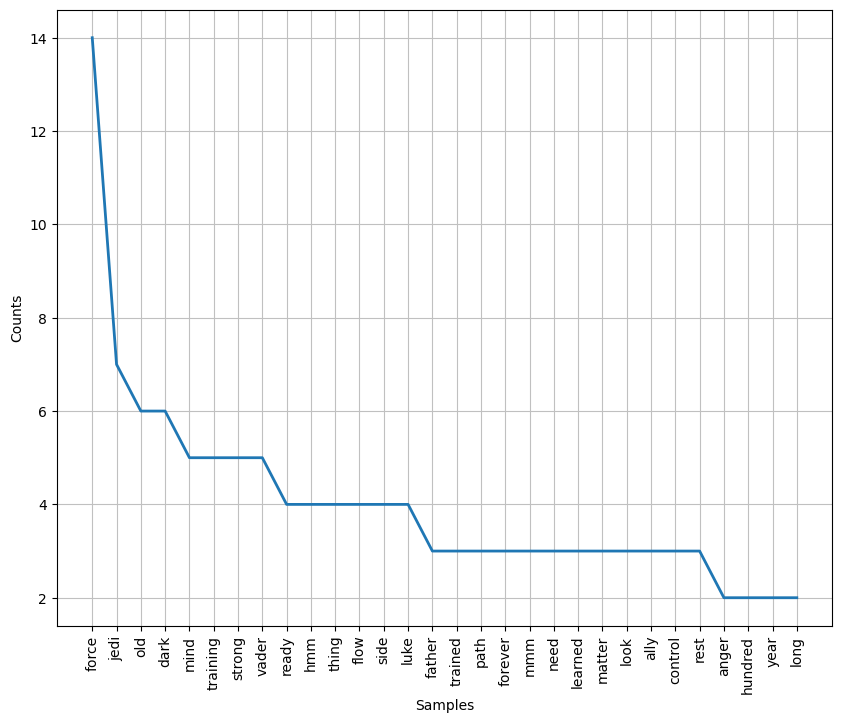

In [78]:
# dialogues of Yoda
yoda_dialogues = ' '.join(filtered_df_yoda['new_script'])

# Tokenize the combined preprocessed text into words
tokens = yoda_dialogues.split()

# Compute the frequency distribution of words
word_freq = Counter(tokens)

# Get the most common words
most_common_words = word_freq.most_common(30)

fdist = FreqDist(tokens)
# Plot the frequency distribution
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 8))
fdist.plot(30, cumulative=False)
plt.show()

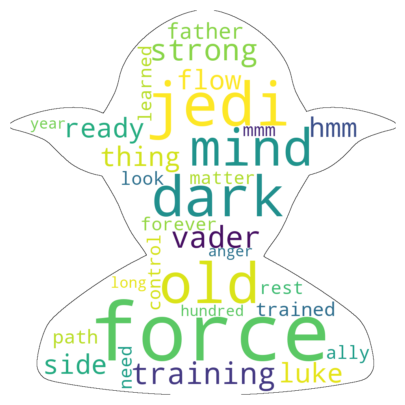

In [80]:
# Get the top 15 words and their counts
top_15_words_dict = dict(fdist.most_common(30))

# Load the mask image
mask_image_path_yoda = os.path.expanduser('~/Desktop/BI/Labs/Lab 4/Lab4_dataset/wordcloud_masks/yoda.png') 
mask_image_yoda = np.array(Image.open(mask_image_path_yoda))

# Generate a word cloud for the top 30words
wordcloud = WordCloud(width=800, height=400, mask=mask_image_yoda, background_color='white', contour_color='black', contour_width=1).generate_from_frequencies(top_15_words_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
# Apply preprocessing to the "new_script" column
df_concatenated['new_script'] = df_concatenated['Dialogue'].apply(preprocess_text)

# Combine all dialogues into a single document per episode
documents = df_concatenated.groupby('Episode')['new_script'].apply(lambda x: ' '.join(x)).tolist()

# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Extract top 20 words with the highest TF-IDF scores for each episode
top_n = 20
tfidf_scores = tfidf_matrix.toarray()

for i, episode in enumerate(df_concatenated['Episode'].unique()):
    episode_tfidf_scores = tfidf_scores[i]
    top_indices = episode_tfidf_scores.argsort()[-top_n:][::-1]
    top_words = [(feature_names[index], episode_tfidf_scores[index]) for index in top_indices]
    print(f"Episode {episode}:")
    for word, score in top_words:
        print(f"{word}: {score:.4f}")
    print("\n")

Episode IV:
luke: 0.2677
ship: 0.1673
think: 0.1548
look: 0.1464
red: 0.1400
back: 0.1380
kenobi: 0.1346
time: 0.1255
ive: 0.1213
take: 0.1213
uncle: 0.1133
he: 0.1087
alderaan: 0.1077
let: 0.1046
ill: 0.1004
station: 0.1004
could: 0.1004
theyre: 0.0962
plan: 0.0921
want: 0.0920


Episode V:
good: 0.1817
lord: 0.1642
artoo: 0.1583
chewie: 0.1524
ship: 0.1524
luke: 0.1466
vader: 0.1407
take: 0.1348
lando: 0.1208
rouge: 0.1191
lightspeed: 0.1191
ill: 0.1173
time: 0.1114
there: 0.1114
let: 0.1055
system: 0.1055
back: 0.1055
could: 0.0997
want: 0.0938
leia: 0.0938


Episode VI:
luke: 0.2489
artoo: 0.2116
father: 0.2053
chewie: 0.1804
master: 0.1742
good: 0.1742
take: 0.1431
back: 0.1369
emperor: 0.1307
friend: 0.1307
na: 0.1282
shield: 0.1244
side: 0.1244
jabba: 0.1120
look: 0.1058
let: 0.1058
vader: 0.0996
help: 0.0996
leia: 0.0933
tell: 0.0933




In [67]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


Average Sentiment Scores for Dark Side Characters:
neg         0.129244
neu         0.618571
pos         0.234339
compound    0.063127
dtype: float64

Average Sentiment Scores for Light Side Characters:
neg         0.111716
neu         0.689981
pos         0.163236
compound    0.043225
dtype: float64


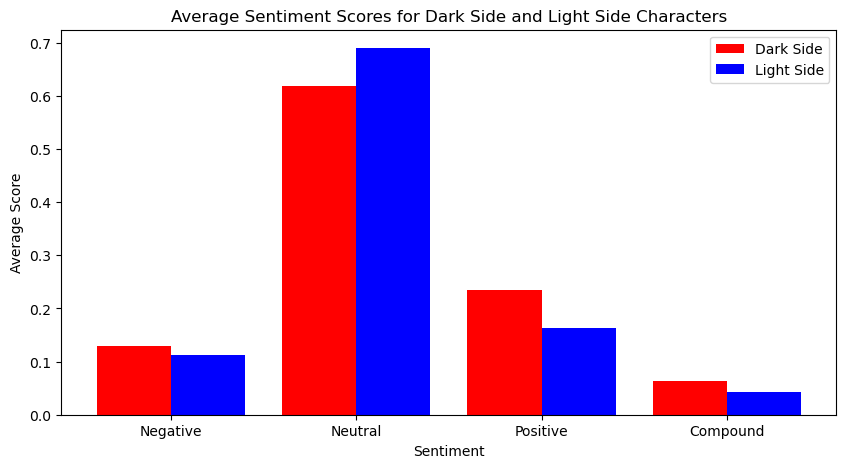

In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Preprocess the text data
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df_concatenated['preprocessed_dialogue'] = df_concatenated['Dialogue'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis
df_concatenated['sentiment'] = df_concatenated['preprocessed_dialogue'].apply(get_sentiment)

# Extract sentiment components
df_concatenated['neg'] = df_concatenated['sentiment'].apply(lambda x: x['neg'])
df_concatenated['neu'] = df_concatenated['sentiment'].apply(lambda x: x['neu'])
df_concatenated['pos'] = df_concatenated['sentiment'].apply(lambda x: x['pos'])
df_concatenated['compound'] = df_concatenated['sentiment'].apply(lambda x: x['compound'])

# Define Dark Side and Light Side characters
dark_side_characters = ['vader', 'palpatine', 'sidious', 'tarkin']
light_side_characters = ['luke', 'yoda', 'leia', 'obi-wan', 'kenobi']

# Filter and calculate average sentiment scores for Dark Side characters
dark_side_df = df_concatenated[df_concatenated['Character'].str.lower().isin(dark_side_characters)]
light_side_df = df_concatenated[df_concatenated['Character'].str.lower().isin(light_side_characters)]

dark_side_avg_sentiment = dark_side_df[['neg', 'neu', 'pos', 'compound']].mean()
light_side_avg_sentiment = light_side_df[['neg', 'neu', 'pos', 'compound']].mean()

print("Average Sentiment Scores for Dark Side Characters:")
print(dark_side_avg_sentiment)
print("\nAverage Sentiment Scores for Light Side Characters:")
print(light_side_avg_sentiment)

# Plotting the sentiment scores
import matplotlib.pyplot as plt

labels = ['Negative', 'Neutral', 'Positive', 'Compound']
dark_side_scores = dark_side_avg_sentiment.values
light_side_scores = light_side_avg_sentiment.values

x = range(len(labels))

plt.figure(figsize=(10, 5))

plt.bar(x, dark_side_scores, width=0.4, label='Dark Side', align='center', color='red')
plt.bar([p + 0.4 for p in x], light_side_scores, width=0.4, label='Light Side', align='center', color='blue')

plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.title('Average Sentiment Scores for Dark Side and Light Side Characters')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

plt.show()

#### Insights

Negative Sentiment:

The Dark Side characters have a slightly higher average negative sentiment score (0.129) compared to the Light Side characters (0.112). This suggests that the dialogue of Dark Side characters contains more negative language, which aligns with their association with anger, fear, and hate.

Neutral Sentiment:

Light Side characters have a higher average neutral sentiment score (0.690) compared to the Dark Side characters (0.619). This indicates that the dialogue of Light Side characters is more neutral, reflecting their calm and composed demeanor as they strive to maintain balance and peace.

Positive Sentiment:

Surprisingly, the Dark Side characters have a higher average positive sentiment score (0.234) compared to the Light Side characters (0.163). This might be due to moments of triumph or confidence expressed by Dark Side characters, which is often depicted in a positive light even though their actions are malevolent.


Compound Sentiment:

The compound sentiment score, which represents the overall sentiment of the text, is higher for Dark Side characters (0.063) than for Light Side characters (0.043). This indicates that, overall, the dialogue of Dark Side characters is slightly more positive than that of Light Side characters, which could be influenced by the higher positive sentiment score.

Conclusion:
The sentiment analysis reveals that while Dark Side characters exhibit more negative sentiment, they also have higher positive sentiment moments, which could reflect their assertive and often triumphant dialogue. In contrast, Light Side characters maintain a more neutral tone, reflecting their calm and balanced approach. These insights align with the thematic elements of the Star Wars universe, where the Dark Side is associated with strong negative emotions, and the Light Side emphasizes control and neutrality.